In [7]:
import numpy as np
import matplotlib.pyplot as plt
##Pick your planet!####


###kelt-9b###
#radjup=1.891
#massjup=2.88
#pdays=1.4811
#rstar=2.362
#Dau=.03462
#tstar=10170.



##hd-209458b##
#radjup=1.39
#massjup=.73
#pdays=3.525
#rstar=1.19
#Dau=.04707
#tstar=6091.



##WASP-76b##
#radjup=1.83
#massjup=.92
#pdays=1.81
#rstar=1.73
#Dau=.033
#tstar=6250.

#wasp-121b
#radjup=1.865
#massjup=1.183
#pdays=1.274925
#rstar=1.458
#Dau=0.02544
#tstar=6459


##WASP-189b##
#radjup=1.374
#massjup=2.13
#pdays=2.72
#rstar=2.33
#Dau=.0477
#tstar=8000.

###WASP-33b###
#radjup=1.593
#massjup=2.093
##pdays=1.22
#rstar=1.444
#Dau=.0239
#tstar=7430


#kelt-16b
#radjup=1.415
#massjup=2.75
#pdays=.96
#rstar=1.444
#Dau=.0239
#tstar=7430



#Kepler 7b
radjup=1.478
massjup=0.433
pdays=4.885
rstar=1.843
Dau=0.062
tstar=5933 


In [6]:
#calculate values necessary for fort.7
radmet=radjup* (7.14e7)
print ("radius: "+ str((radmet)/1e8) + "e8 m")
masskg=massjup*1.899e27
bigG=6.67e-11 #m^3 kg^-1 s^-2
surfgrav=(bigG*masskg)/ ((radmet)**2)
print ("surface gravity:" + str(surfgrav))
ww=(2*np.pi)/(pdays*24*3600)
print ("ww: "+ str(ww))
sigmasb=5.671e-5
dcm=Dau*1.496e13
rstarcm=rstar* 6.96e10
Tirrcalc=((rstarcm/dcm)**.5)*(tstar)
print ('T_irr: '+ str(Tirrcalc))
solc_in=(Tirrcalc**4)*sigmasb #erg/cm^2
solc_in=solc_in*100*100*(1e-7)
print ("solc_in: " + str(solc_in/(1e6))+ "e6")
rstarm=rstar*6.96e8
print ('rstar(m):'+ str(rstarm/1e9) + 'e9')
orbsep=Dau*1.496e11
print ('Orb_Sep (m):' + str(orbsep/1e9)+ 'e9')
Teq = (tstar*((rstarm/(2*orbsep))**(1/2)))
print ('Teq:', Teq)

radius: 1.055292e8 m
surface gravity:4.924854490005907
ww: 1.4886806994151565e-05
T_irr: 2206.3783849713136
solc_in: 1.3439392081182704e6
rstar(m):1.282728e9
Orb_Sep (m):9.2752e9
Teq: 1560.1451178766386


3056.61
3054.11
3050.82
3046.5
3040.82
3033.36
3023.58
3010.79
2994.09
2972.35
2944.2
2907.93
2861.59
2803.03
2730.17
2641.5
2537.06
2419.9
2298.0
2185.06
2097.17
2043.65
2019.98
2013.08
2012.18
2012.65
2013.46
2014.53
2015.95
2017.8
2020.24
2023.44
2027.64
2033.13
2040.3
2049.65
2061.77
2077.43
2097.55
2123.22
2155.7
2196.39
2246.8
2308.46
2382.87
2471.4
2575.26
2695.43
2832.71
2987.75


/home/imalsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


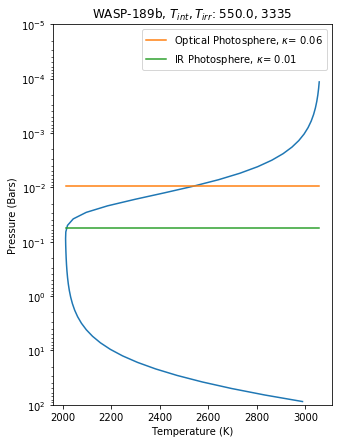

In [8]:
#setting up your tp profile 
f=.23
kth=(1e-2) *1 #ABSLW
kvis=(4e-3) *15 #ABSSW
gamma=(kvis/kth)
grav=8.45
surfp=100
tirr=3335
tint=550.
oom=6
nlay=50
longpost=True #print off temperatures for pasting into fort.7

def avgsurface(tau,tirr,tint): #EQ 29. CORRECT ONE!
    first=.75*(tint**4)*((2./3.)+ tau)
    second=.75*(tirr**4)*f*( (2./3.)+ (1/(gamma * np.sqrt(3))) + ((gamma/np.sqrt(3)) - (1/(gamma*np.sqrt(3))))*np.exp(-gamma*tau*np.sqrt(3)))
    final=first+second
    return final**.25
def makeinitialtprofs(nlay,oom,surfp,tirr,tint):
    sigma=np.empty([nlay])*0.0  #calculating array of pressure values based on # of layers 
    if oom>0: #setting up pressure values 
        stp=-1.0*oom/nlay
        sigma[nlay-1]=10.**(stp/2.)
        for n in range(nlay-2,-1,-1):
            sigma[n]=sigma[n+1]*10.**(stp)
    p_BAR=sigma*surfp
    taus=np.copy(p_BAR)
    taus=(10*p_BAR* 1000)/(943.4) #converting to optical depths 
    initialts=np.copy(taus)
    for i in range(len(taus)):
        initialts[i]=avgsurface(taus[i],tirr,tint)
    return initialts, p_BAR

temps,press=makeinitialtprofs(nlay,oom,surfp,tirr,tint)

if longpost==True:
    for i in range(len(temps)):
        print (round(temps[i],2))
else:
    
    print (temps)
temparray=np.linspace(min(temps), max(temps),100)
vissphere=((6.67e-5)*grav)/kvis
irsphere=((6.67e-5)*grav)/kth
fig, ax = plt.subplots(1,1, figsize=(5, 7),sharex=False,sharey=True, gridspec_kw={'hspace': .35, 'wspace': 0})
ax.plot(temps,press)
ax.plot(temparray,np.ones(100)*vissphere, label=r'Optical Photosphere, $\kappa$= '+ str(kvis))
ax.plot(temparray,np.ones(100)*irsphere, label=r'IR Photosphere, $\kappa$= '+ str(kth))
ax.set_yscale('log')
ax.legend()
ax.set_ylim(100,1e-5)
ax.set_ylabel('Pressure (Bars)')
ax.set_xlabel('Temperature (K)')
ax.set_title(r'WASP-189b, $T_{int}, T_{irr}$: '+str(tint) + ', ' + str(tirr))
fig.show()

In [16]:
import pandas as pd
levelarray=(np.linspace(0,49,50,endpoint=True))
for i in range(len(levelarray)):
    levelarray[i]=int(levelarray[i])
#print (levelarray)
#print (temps)
#print (press)
arrayforpd=np.zeros((50,3))
arrayforpd[:,0]=levelarray
arrayforpd[:,1]=press
arrayforpd[:,2]=temps
print(arrayforpd[3,:])
#dataframe = pd.DataFrame.from_records(arrayforpd)
#dataframe=pd.DataFrame(arrayforpd, columns=['i','P','T'], dtype={'i':int,'P':float, 'T':float})
dataframe=pd.DataFrame(arrayforpd, columns=['i','P','T'])
convert_dict={'i': int}
dataframe=dataframe.astype(convert_dict)
print (dataframe.dtypes)
print (dataframe.iloc[3,:])

print (dataframe)
#dataframe.to_csv('/Users/hbeltz/Documents/UHJ1D/wasp76tp.dat',index=False, sep='\t', float_format='%5.8E')

[3.00000000e+00 2.63026799e-04 3.04649717e+03]
i      int64
P    float64
T    float64
dtype: object
i       3.000000
P       0.000263
T    3046.497174
Name: 3, dtype: float64
     i          P            T
0    0   0.000115  3056.606653
1    1   0.000151  3054.108213
2    2   0.000200  3050.820630
3    3   0.000263  3046.497174
4    4   0.000347  3040.815853
5    5   0.000457  3033.357842
6    6   0.000603  3023.580820
7    7   0.000794  3010.786839
8    8   0.001047  2994.085208
9    9   0.001380  2972.352565
10  10   0.001820  2944.195700
11  11   0.002399  2907.928945
12  12   0.003162  2861.589074
13  13   0.004169  2803.029775
14  14   0.005495  2730.168535
15  15   0.007244  2641.502969
16  16   0.009550  2537.058190
17  17   0.012589  2419.899134
18  18   0.016596  2297.995536
19  19   0.021878  2185.060140
20  20   0.028840  2097.174831
21  21   0.038019  2043.652836
22  22   0.050119  2019.983047
23  23   0.066069  2013.081349
24  24   0.087096  2012.178747
25  25   0.114815  